In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [44]:
df=pd.read_csv("imports-85.data",names=["symboling","normalized_losses","make","fuel_type","aspiration","num_of_doors",
                     "body_style","drive_wheels","engine_location","wheel_base","length","width","height",
                     "curb_weight","engine_type","num_of_cylinders","engine_size","fuel_system","bore",
                     "stroke","compression_ratio","horsepower","peak_rpm","city_mpg","highway_mpg","price"])

In [45]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [47]:
df.describe()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

In [50]:
noise_free = df[(df == "?").sum(axis=1)==0]

In [52]:
noise_free

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [53]:
df_data = df.replace('?', np.nan)
df_data.isnull().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [54]:
df.duplicated().sum()

np.int64(0)

In [55]:
#filling the normalized-losses
df_temp=df[df["normalized_losses"]!="?"]
normalized_mean=df_temp["normalized_losses"].astype(float).mean()
df["normalized_losses"]=df["normalized_losses"].replace("?",normalized_mean).astype(float)

In [56]:
#filling the data of price
df_temp=df[df["price"]!="?"]
price_mean=df_temp["price"].astype(float).mean()
df["price"]=df["price"].replace("?",price_mean).astype(float)
#filling the data of horsepower
df_temp=df[df["horsepower"]!="?"]
horsepower_mean=df_temp["horsepower"].astype(float).mean()
df["horsepower"]=df["horsepower"].replace("?",horsepower_mean).astype(float)
#filling the data of bore
df_temp=df[df["bore"]!="?"]
bore_mean=df_temp["bore"].astype(float).mean()
df["bore"]=df["bore"].replace("?",bore_mean).astype(float)
#filling the data of peak_rpm
df_temp=df[df["peak_rpm"]!="?"]
peak_mean=df_temp["peak_rpm"].astype(float).mean()
df["peak_rpm"]=df["peak_rpm"].replace("?",peak_mean)
#filling the data of stroke
df_temp=df[df["stroke"]!="?"]
stroke_mean=df_temp["stroke"].astype(float).mean()
df["stroke"]=df["stroke"].replace("?",stroke_mean)
#filling the data of no_of_doors
df_temp=df[df["num_of_doors"]!="?"]
doors=df_temp["num_of_doors"].mode()
df["num_of_doors"]=df["num_of_doors"].replace("?",doors.iloc[0])

In [57]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500,18,22,17450.0


In [58]:
df.describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,compression_ratio,horsepower,city_mpg,highway_mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,10.142537,104.256158,25.219512,30.751220,13207.129353
std,1.245307,31.681008,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,3.972040,39.519211,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,7.000000,48.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,8.600000,70.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,9.000000,95.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,9.400000,116.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,23.000000,288.000000,49.000000,54.000000,45400.000000


In [59]:
(df=="?").sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

# Compare Frequnecy Distribution for any Two columns by Histogram 

In [60]:
bins=[47,52,57,62,67,72,77]

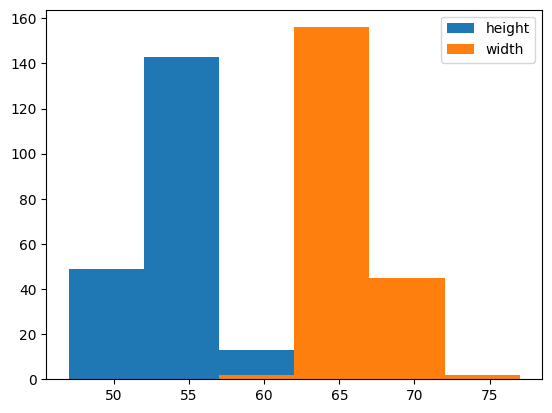

In [61]:
plt.hist(df["height"], bins, alpha=1, label='height')
plt.hist(df["width"], bins, alpha=1, label='width')
plt.legend(loc='best')
plt.show()

# Finding the Most popular car

In [62]:
pop=df["make"].value_counts()

In [63]:
pop[pop==pop.max()].index[0]

'toyota'

In [64]:
print("Most popular car is",pop[pop==pop.max()].index[0].upper())

Most popular car is TOYOTA


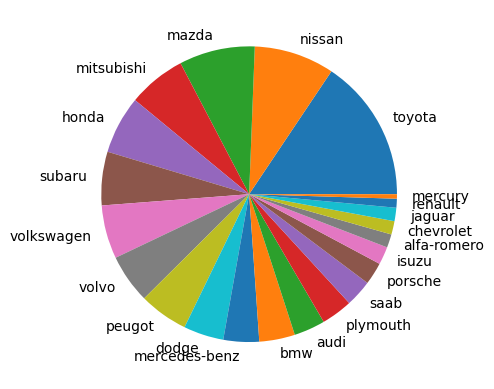

In [65]:
plt.fig_size=(30,30)
plt.pie(pop,labels=pop.index);
plt.show();

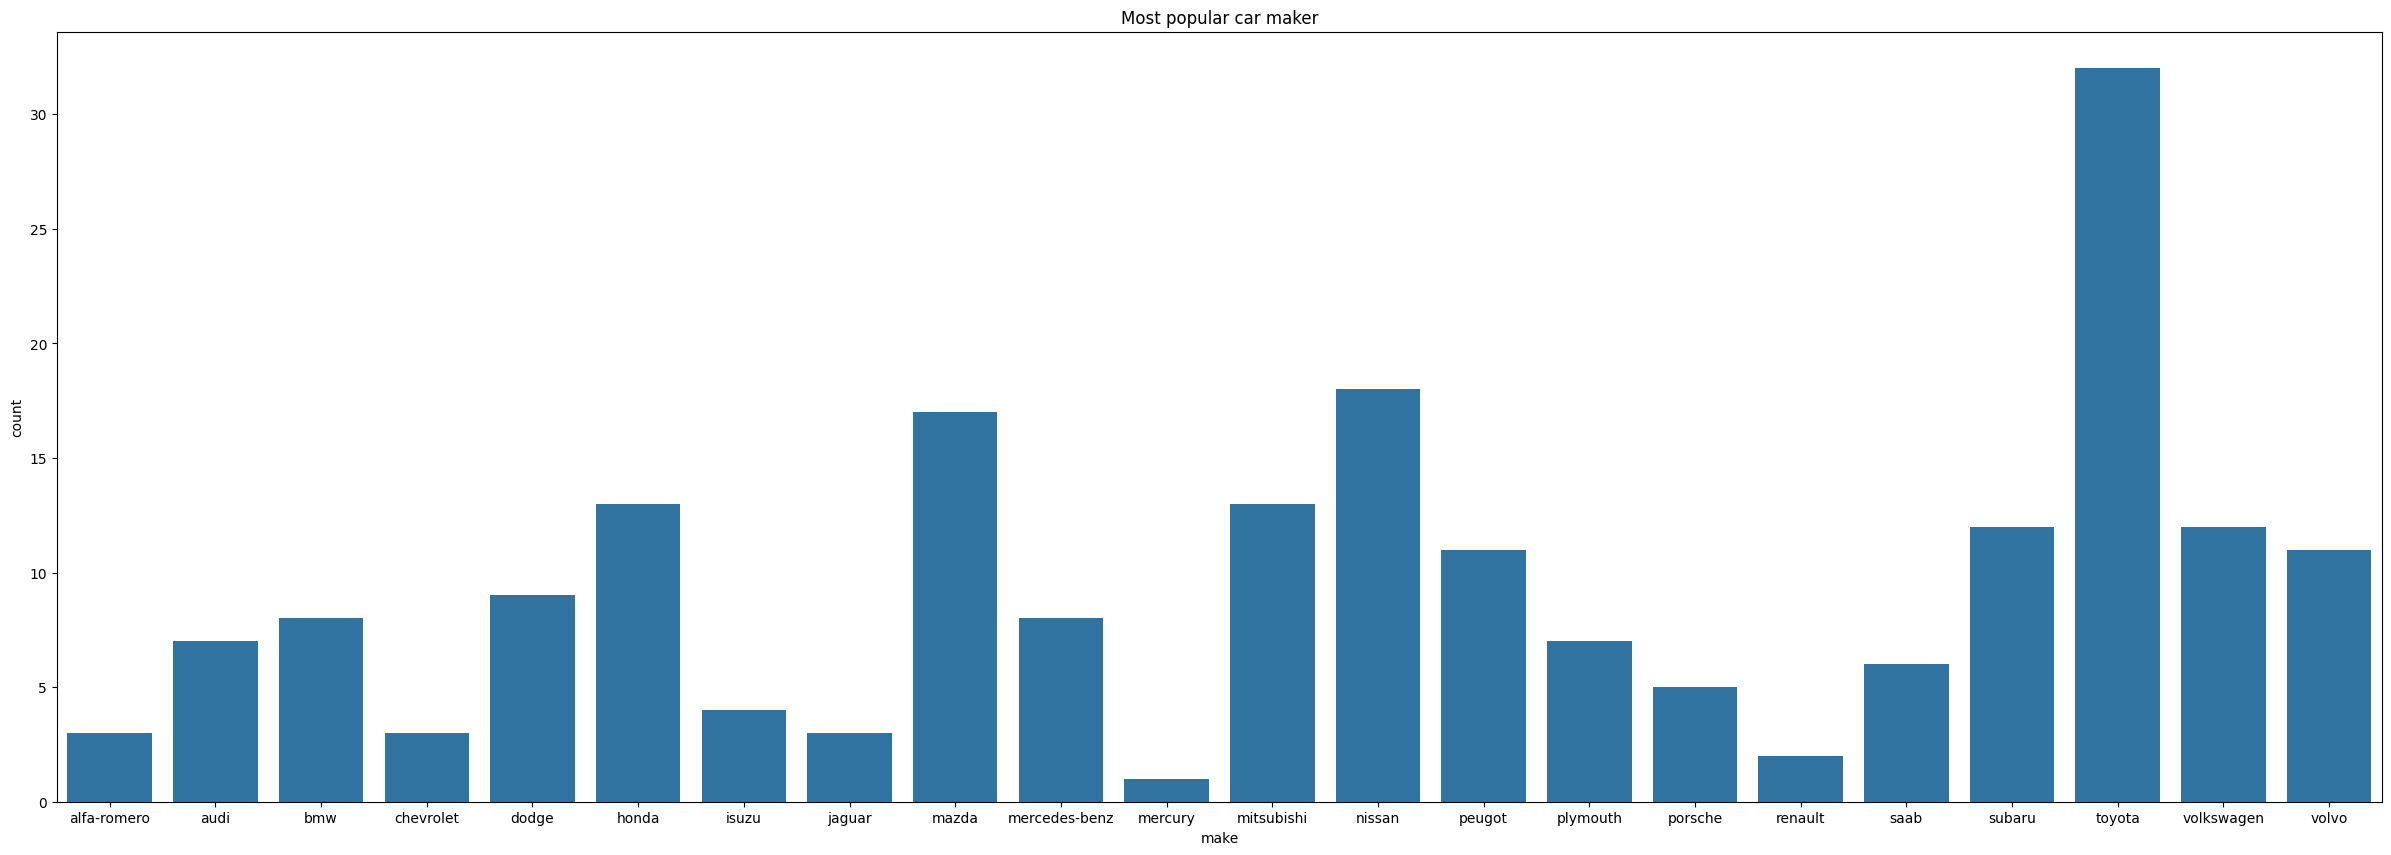

In [66]:
plt.figure(figsize=(30,10))
plt.title('Most popular car maker')
sns.countplot(x = df['make'], data = df)
plt.show()

# Plotting barcahrt to compare capacity of any two cars along with their cost

In [67]:
audi=df[df["make"]=="audi"]

In [68]:
data=audi[["engine_size","horsepower","price"]].mean()

In [69]:
data

engine_size      130.714286
horsepower       121.000000
price          17194.589908
dtype: float64

In [70]:
volvo=df[df["make"]=="volvo"]

In [71]:
data1=volvo[["engine_size","horsepower","price"]].mean()

In [72]:
data1

engine_size      142.272727
horsepower       128.000000
price          18063.181818
dtype: float64

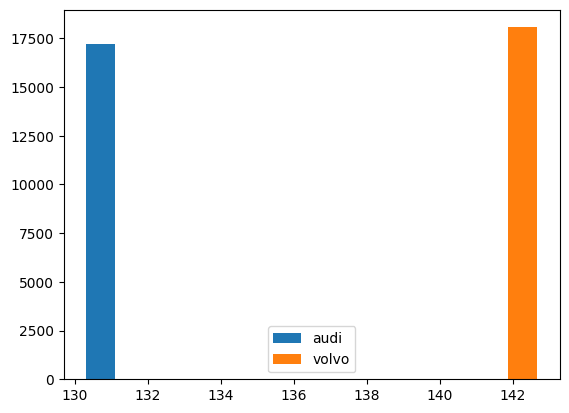

In [73]:
plt.bar(x=data["engine_size"],height=data["price"],label="audi")
plt.bar(x=data1["engine_size"],height=data1["price"],label="volvo")
plt.legend();

<Figure size 3000x1000 with 0 Axes>

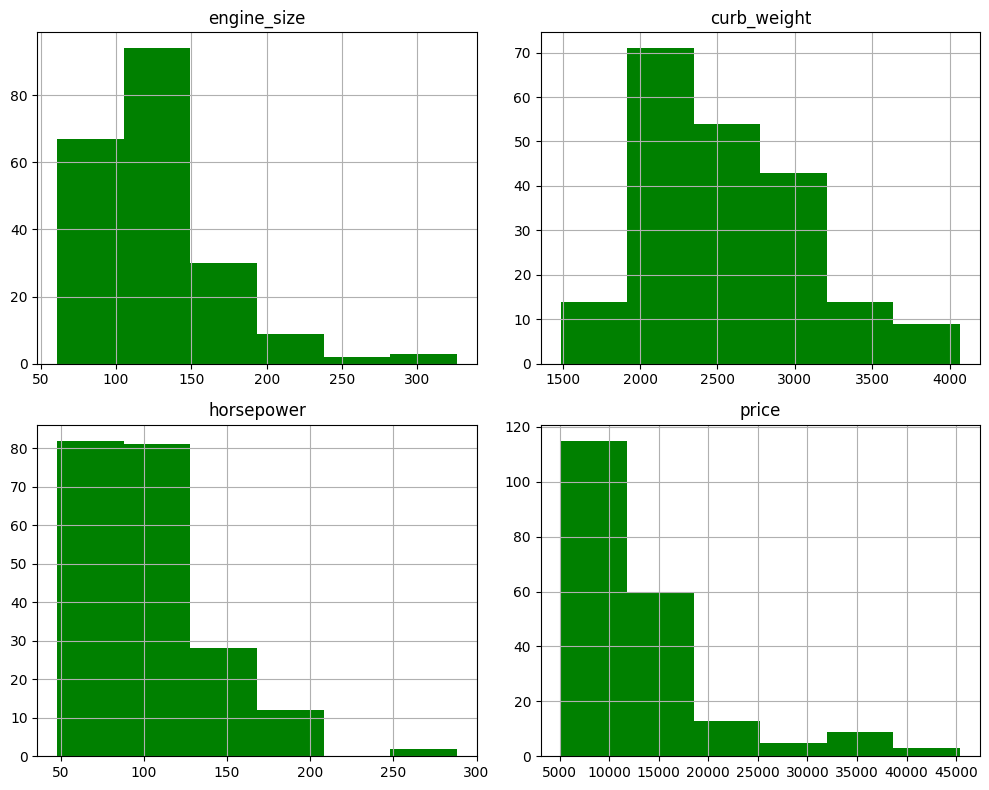

In [74]:
plt.figure(figsize=(30,10))
df[['engine_size','peak_rpm','curb_weight','horsepower','price']].hist(figsize=(10,8),bins=6,color='g')
plt.tight_layout()
plt.show()

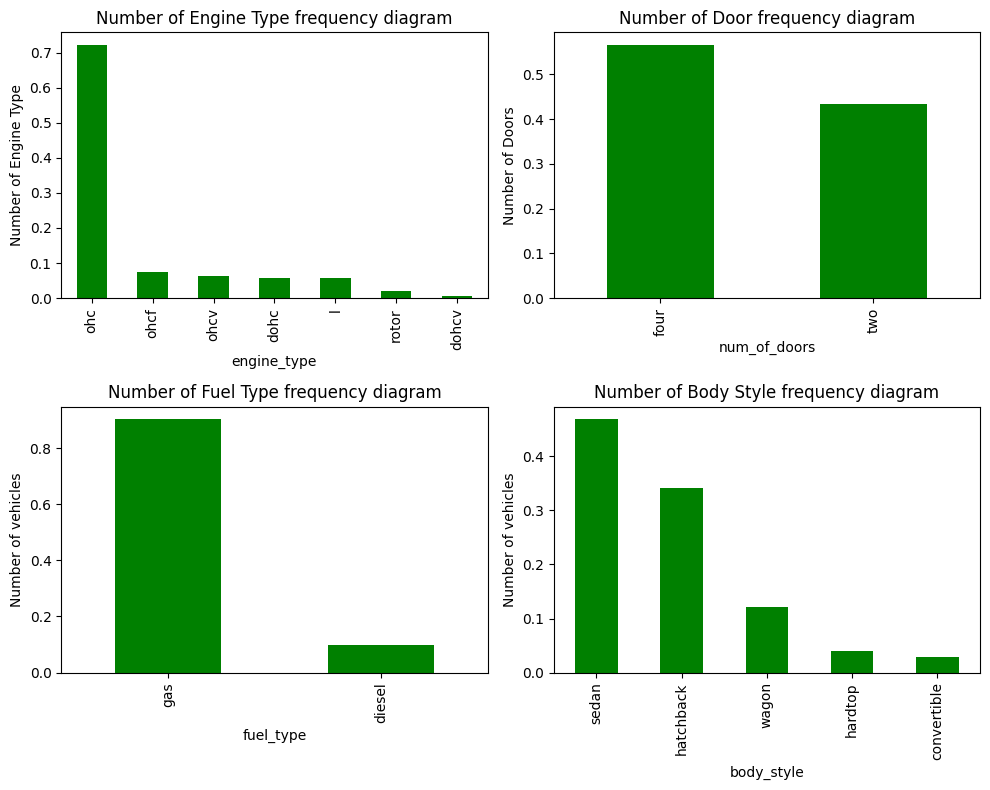

In [75]:
plt.figure(1)
plt.subplot(221)
df['engine_type'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='g')
plt.title("Number of Engine Type frequency diagram")
plt.ylabel('Number of Engine Type')
plt.xlabel('engine_type');


plt.subplot(222)
df['num_of_doors'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='g')
plt.title("Number of Door frequency diagram")
plt.ylabel('Number of Doors')
plt.xlabel('num_of_doors');

plt.subplot(223)
df['fuel_type'].value_counts(normalize= True).plot(figsize=(10,8),kind='bar',color='g')
plt.title("Number of Fuel Type frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('fuel_type');

plt.subplot(224)
df['body_style'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='g')
plt.title("Number of Body Style frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('body_style');
plt.tight_layout()
plt.show()

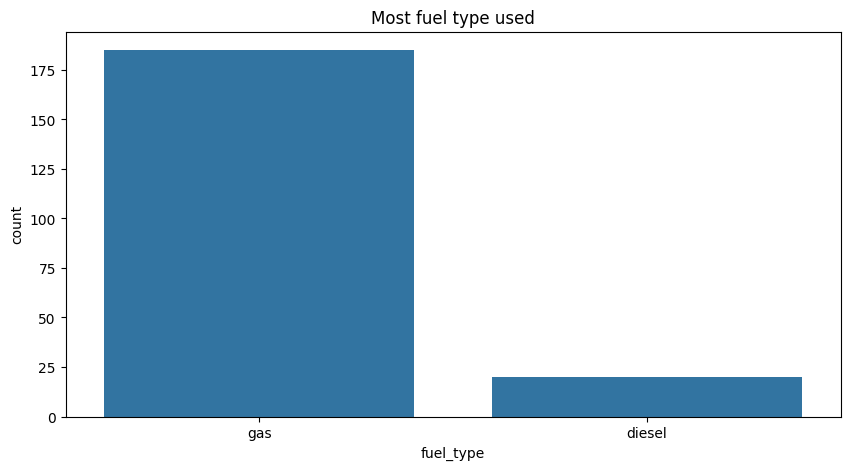

In [76]:
plt.figure(figsize=(10,5))
plt.title('Most fuel type used')
sns.countplot(x =df['fuel_type'], data = df);

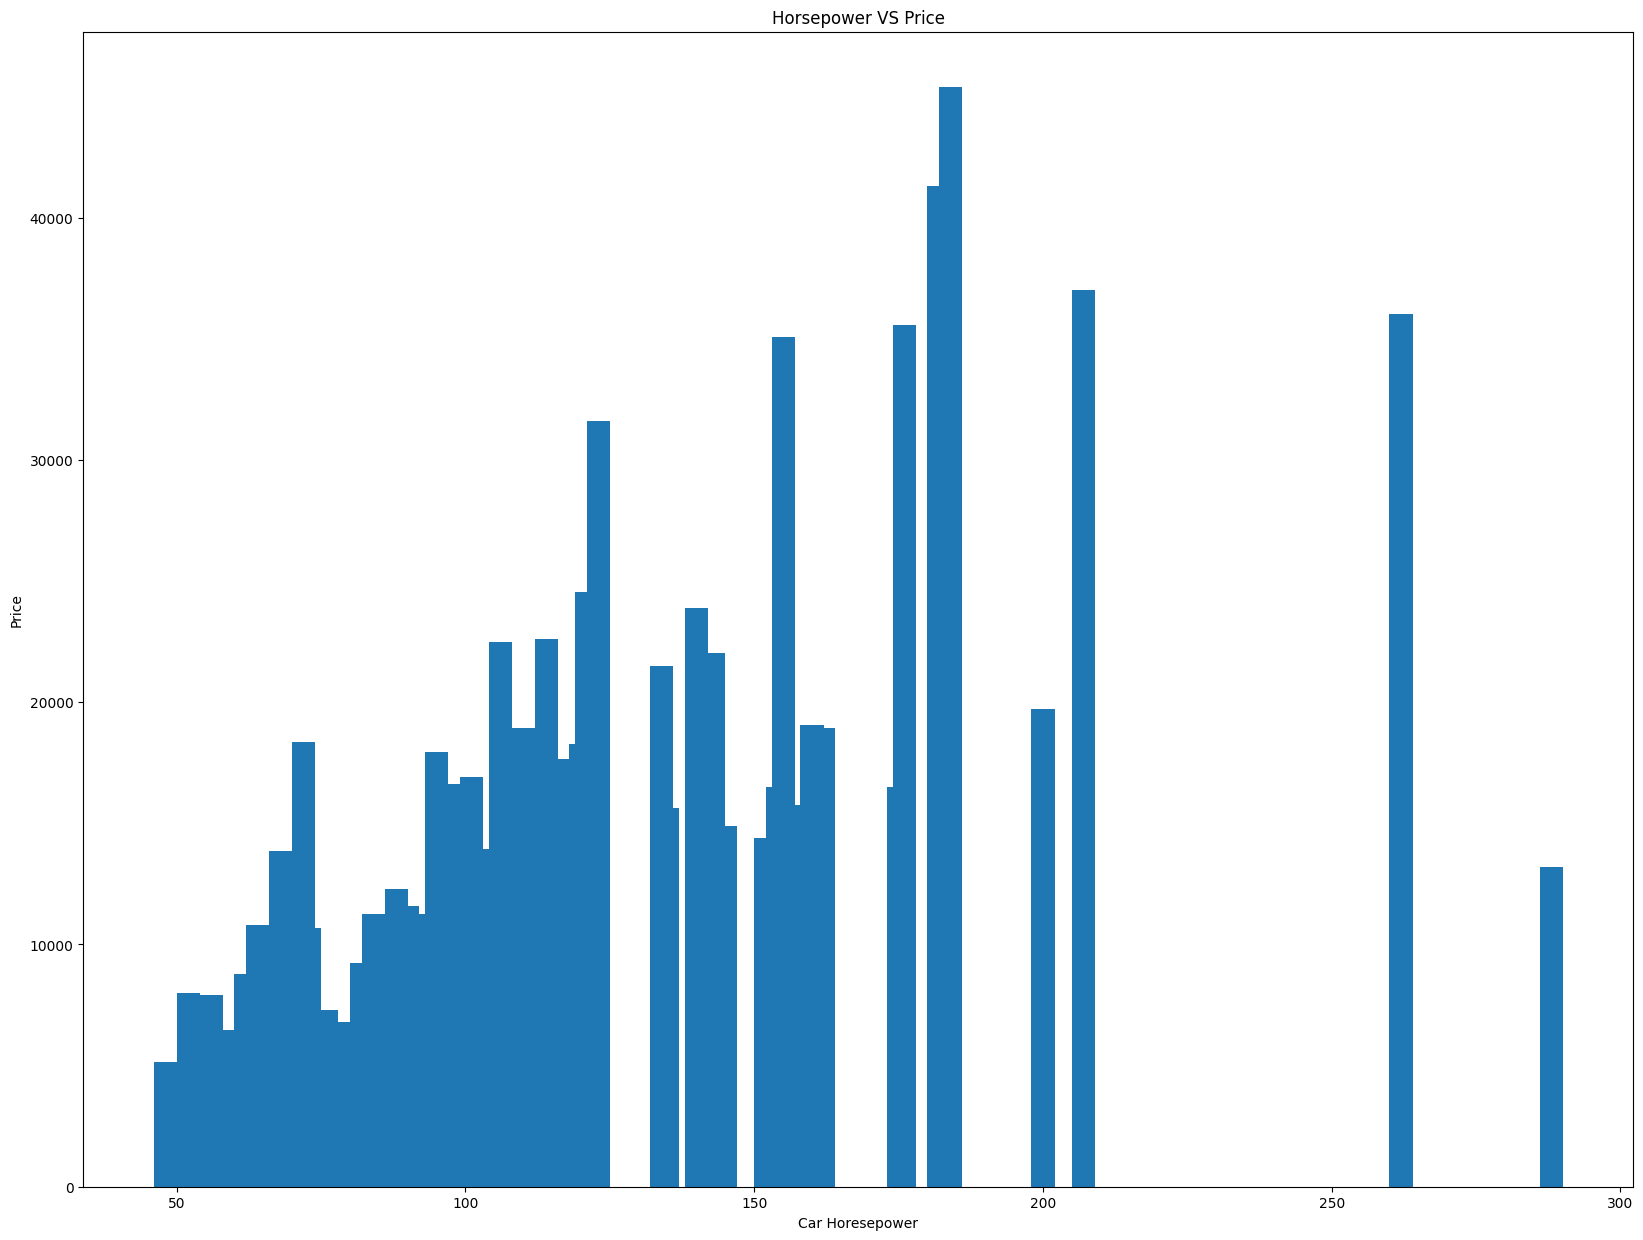

In [77]:
plt.figure(figsize=(20, 15))
plt.bar(df["horsepower"],df["price"],width=4);
plt.title('Horsepower VS Price')
plt.xlabel('Car Horesepower')
plt.ylabel('Price')
plt.show()

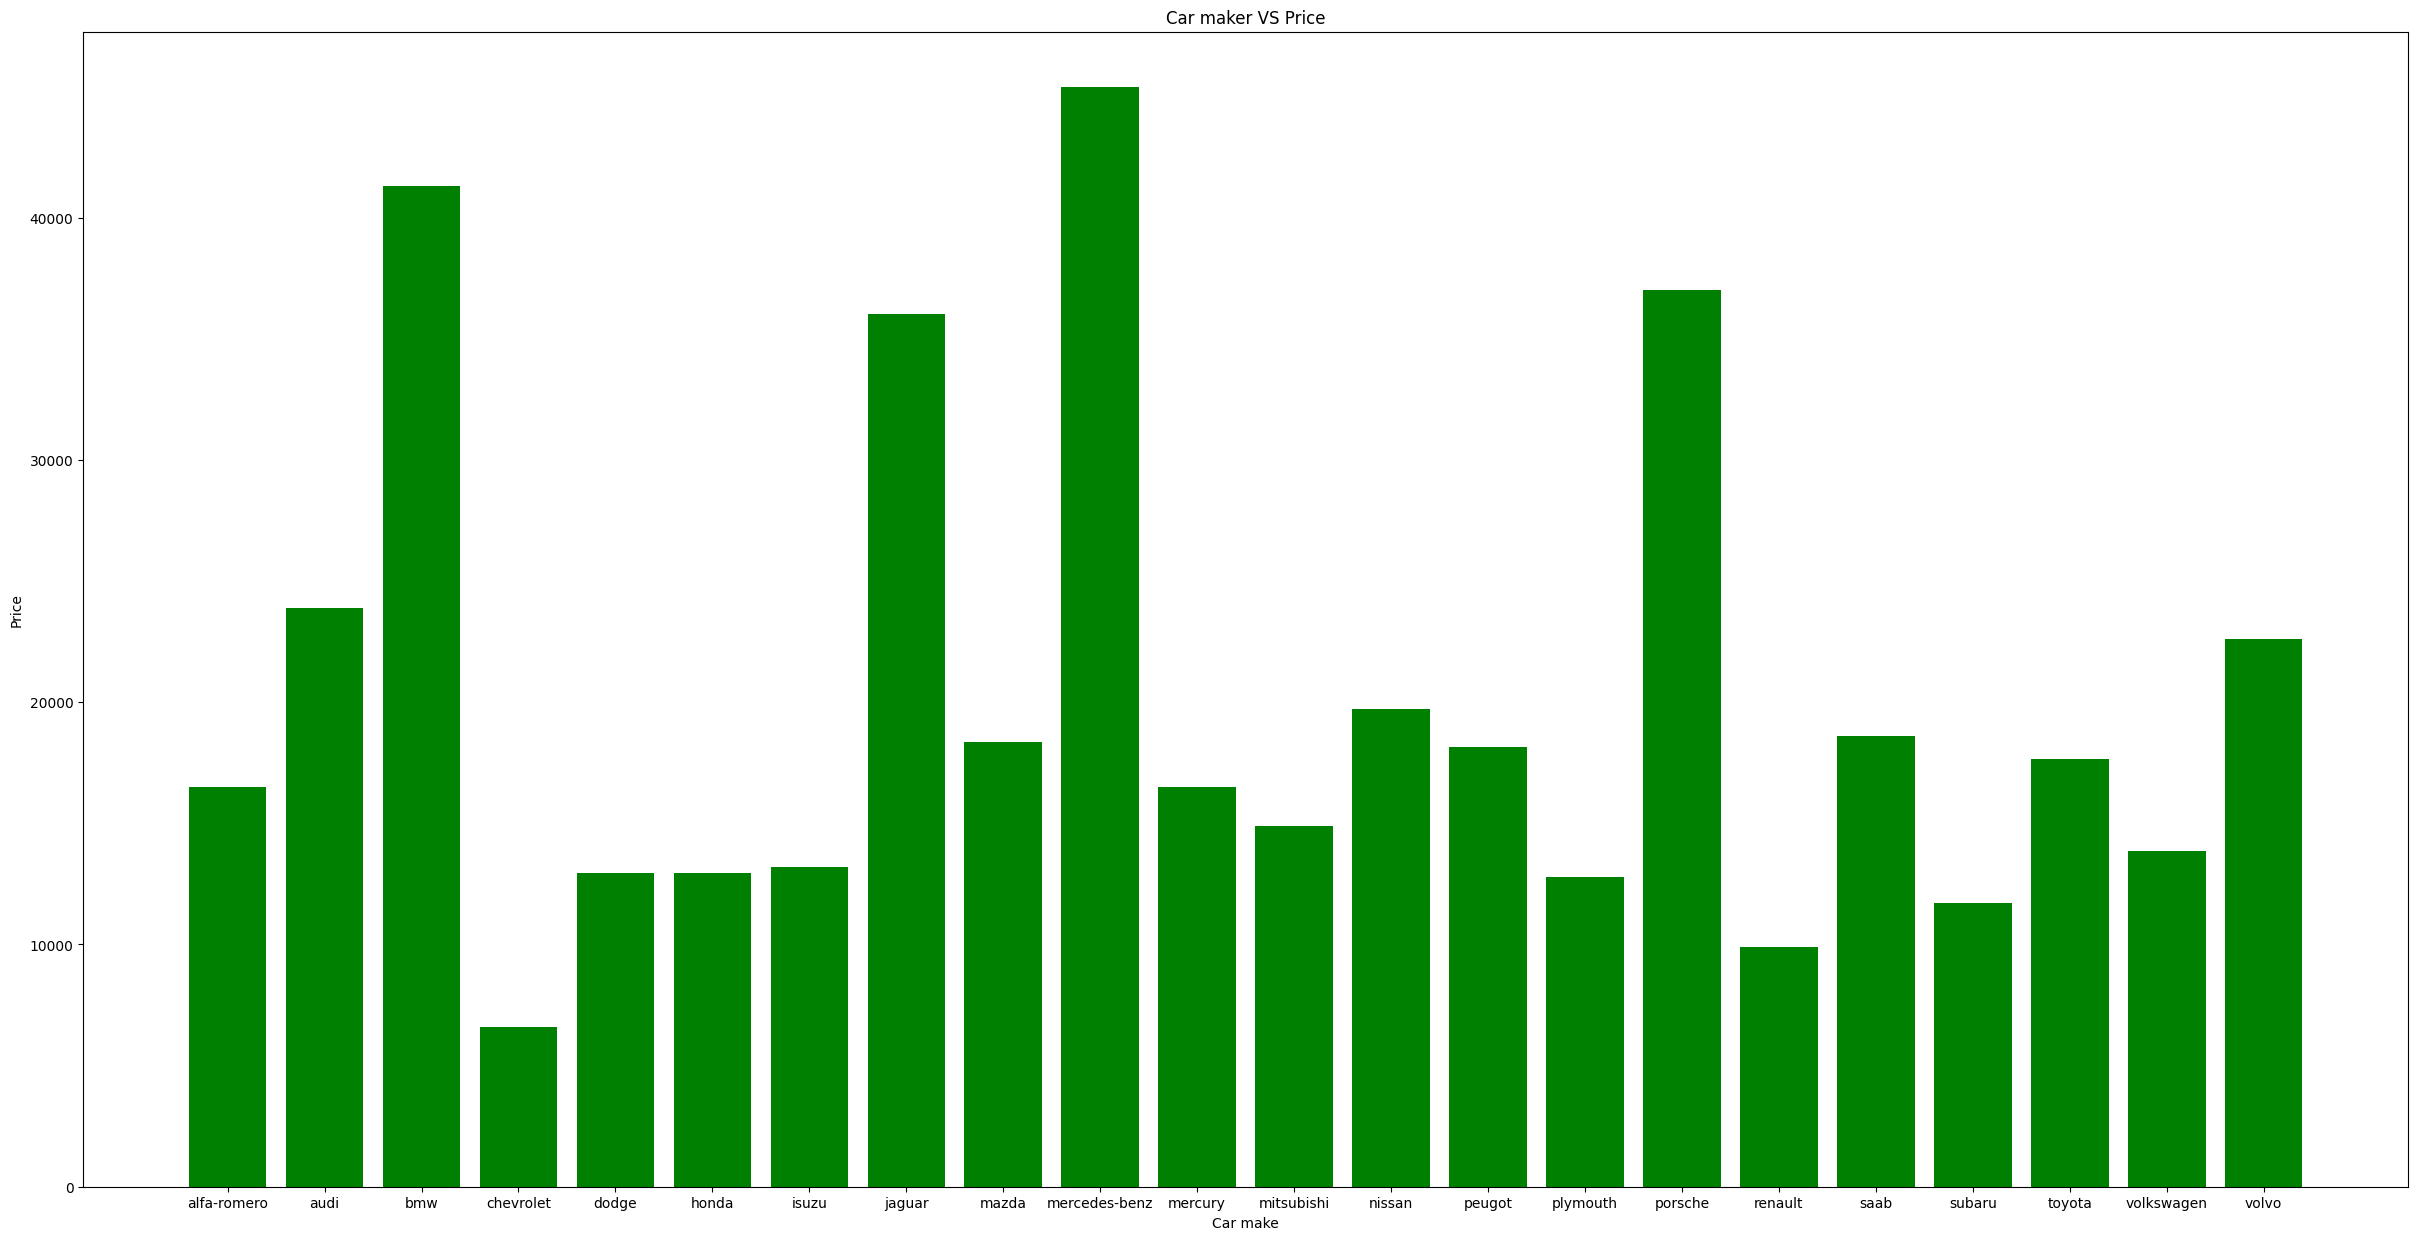

In [78]:
plt.figure(figsize=(30, 15))
plt.bar(df["make"],df["price"], color = 'green');
plt.title('Car maker VS Price')
plt.xlabel('Car make')
plt.ylabel('Price')
plt.show()

<Axes: title={'center': 'Car Price'}, ylabel='price'>

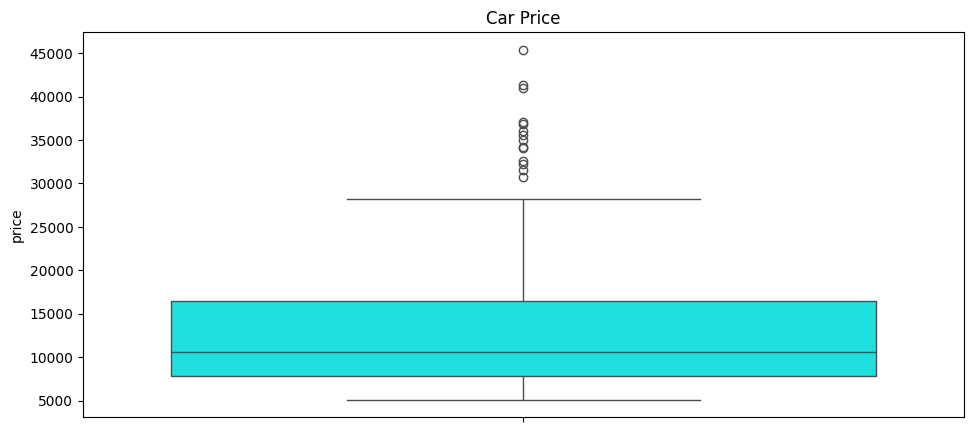

In [79]:
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
plt.title("Car Price")
sns.boxplot(df["price"],color = 'cyan')

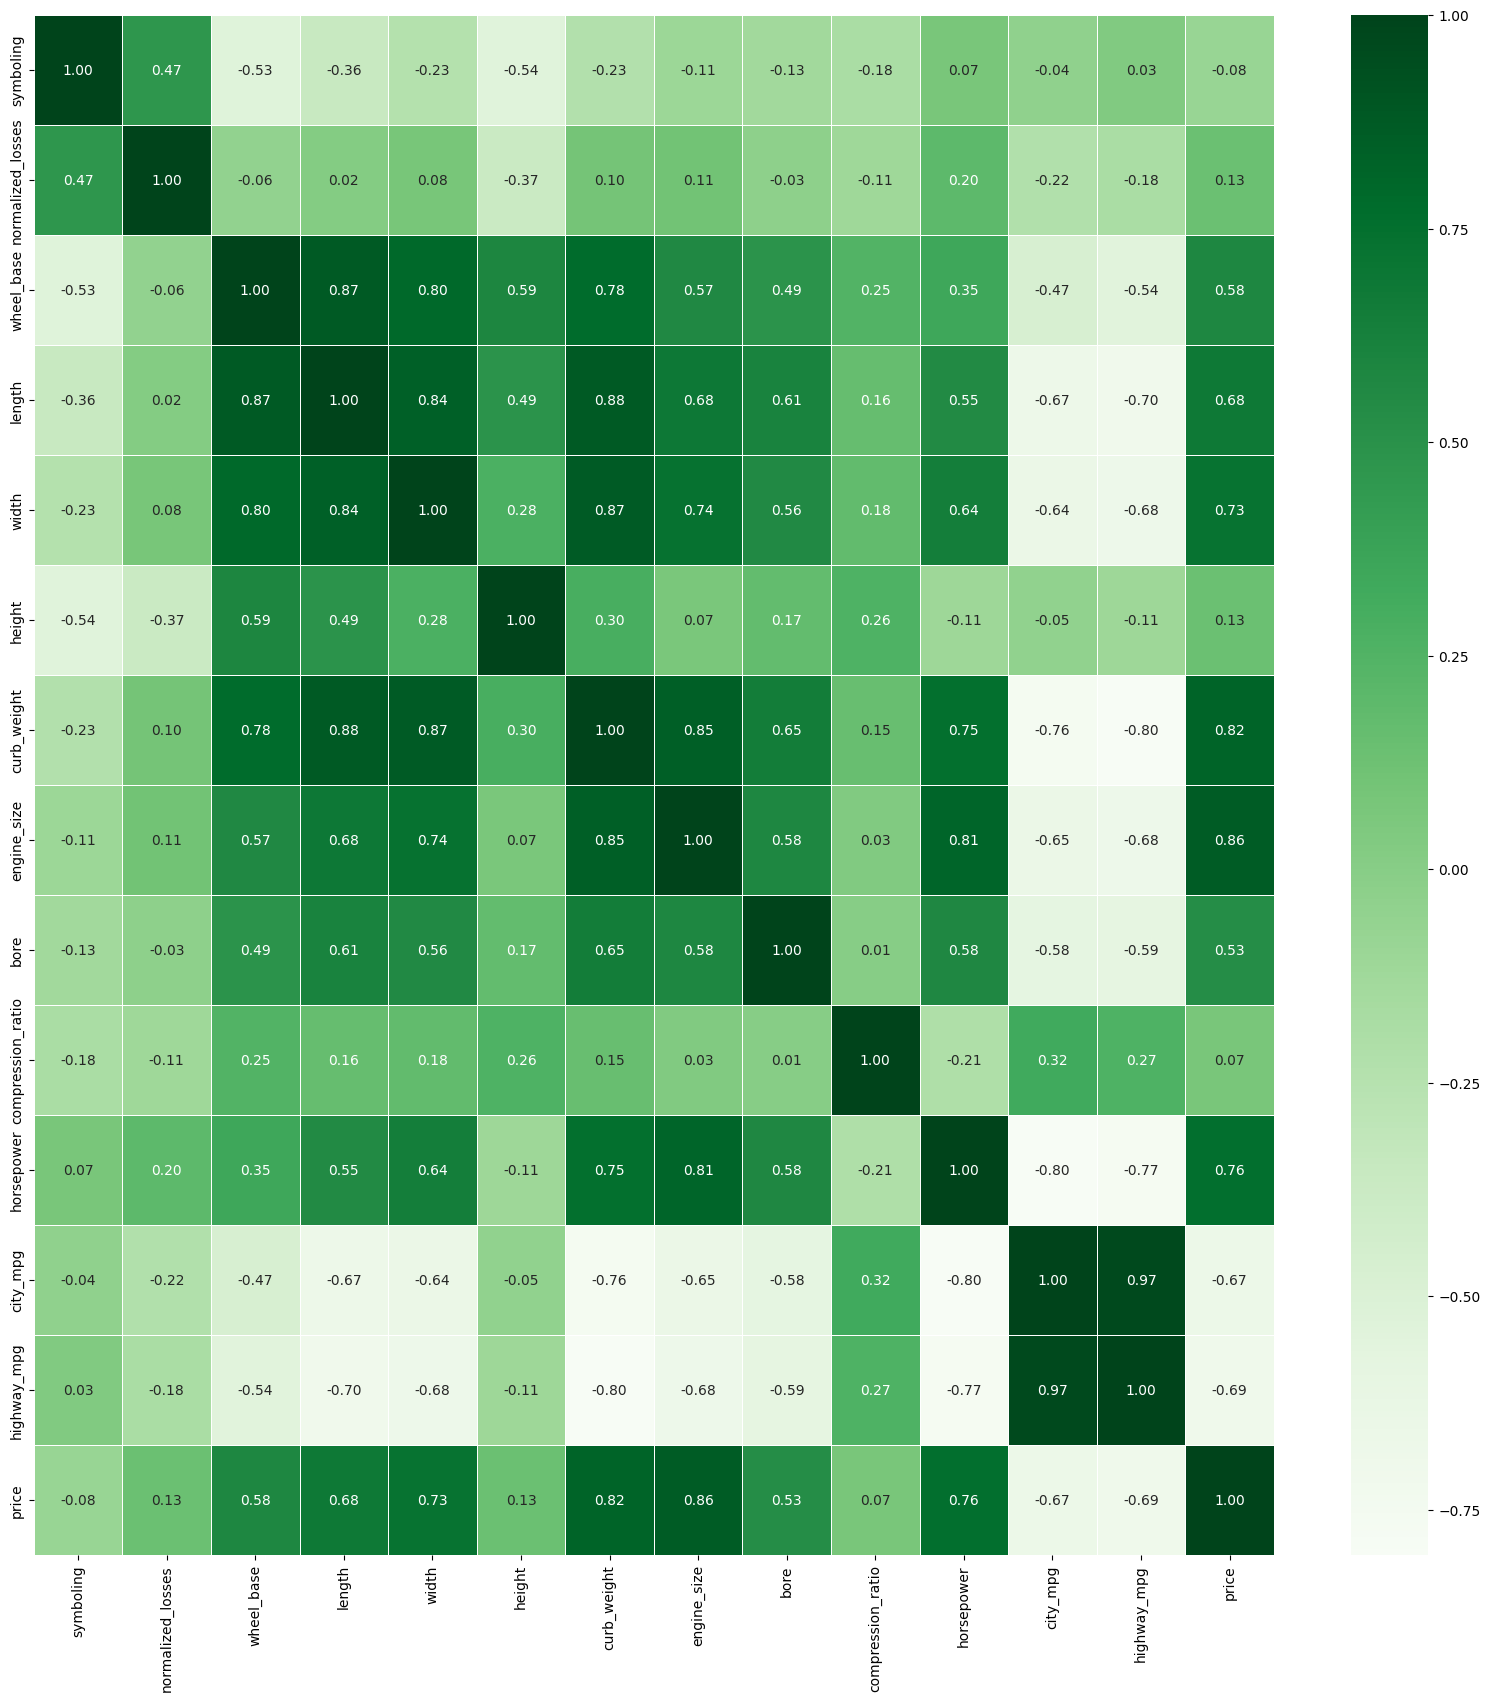

In [82]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(20,20))
s = sns.heatmap(corr, annot=True, fmt='.2f',cmap="Greens",linewidths=.6)

C:\Users\Lab3\AppData\Local\Temp\ipykernel_8368\4288953604.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="make", y="price", data=df, palette="cool_r")


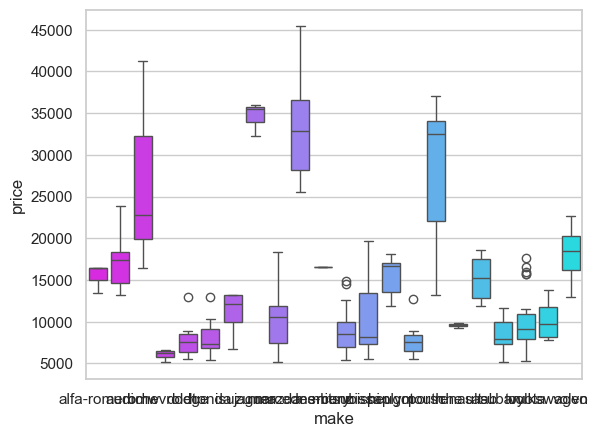

In [83]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="make", y="price", data=df, palette="cool_r")

C:\Users\Lab3\AppData\Local\Temp\ipykernel_8368\2549837697.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="body_style", y="price", data=df,palette="tab20_r" )


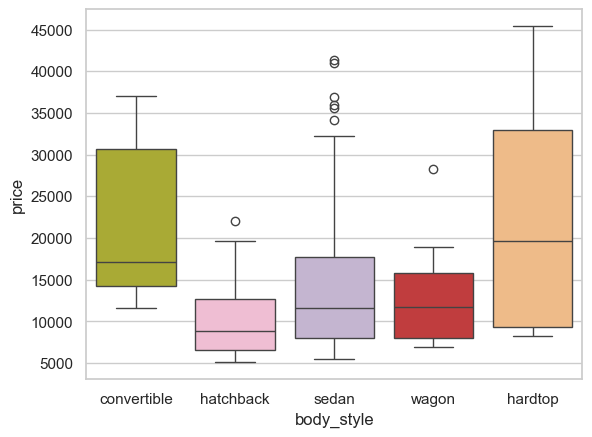

In [84]:
ax = sns.boxplot(x="body_style", y="price", data=df,palette="tab20_r" )

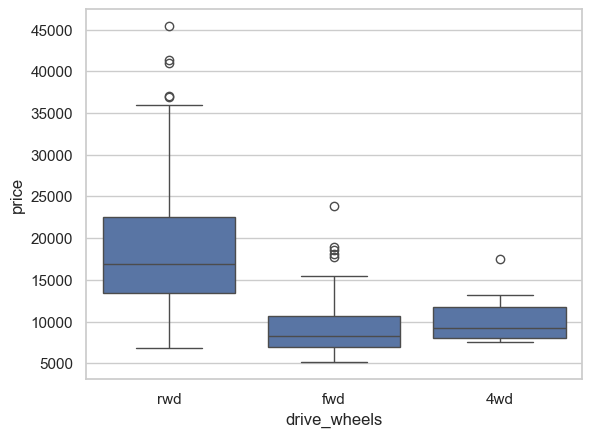

In [85]:
ax = sns.boxplot(x="drive_wheels", y="price", data=df)

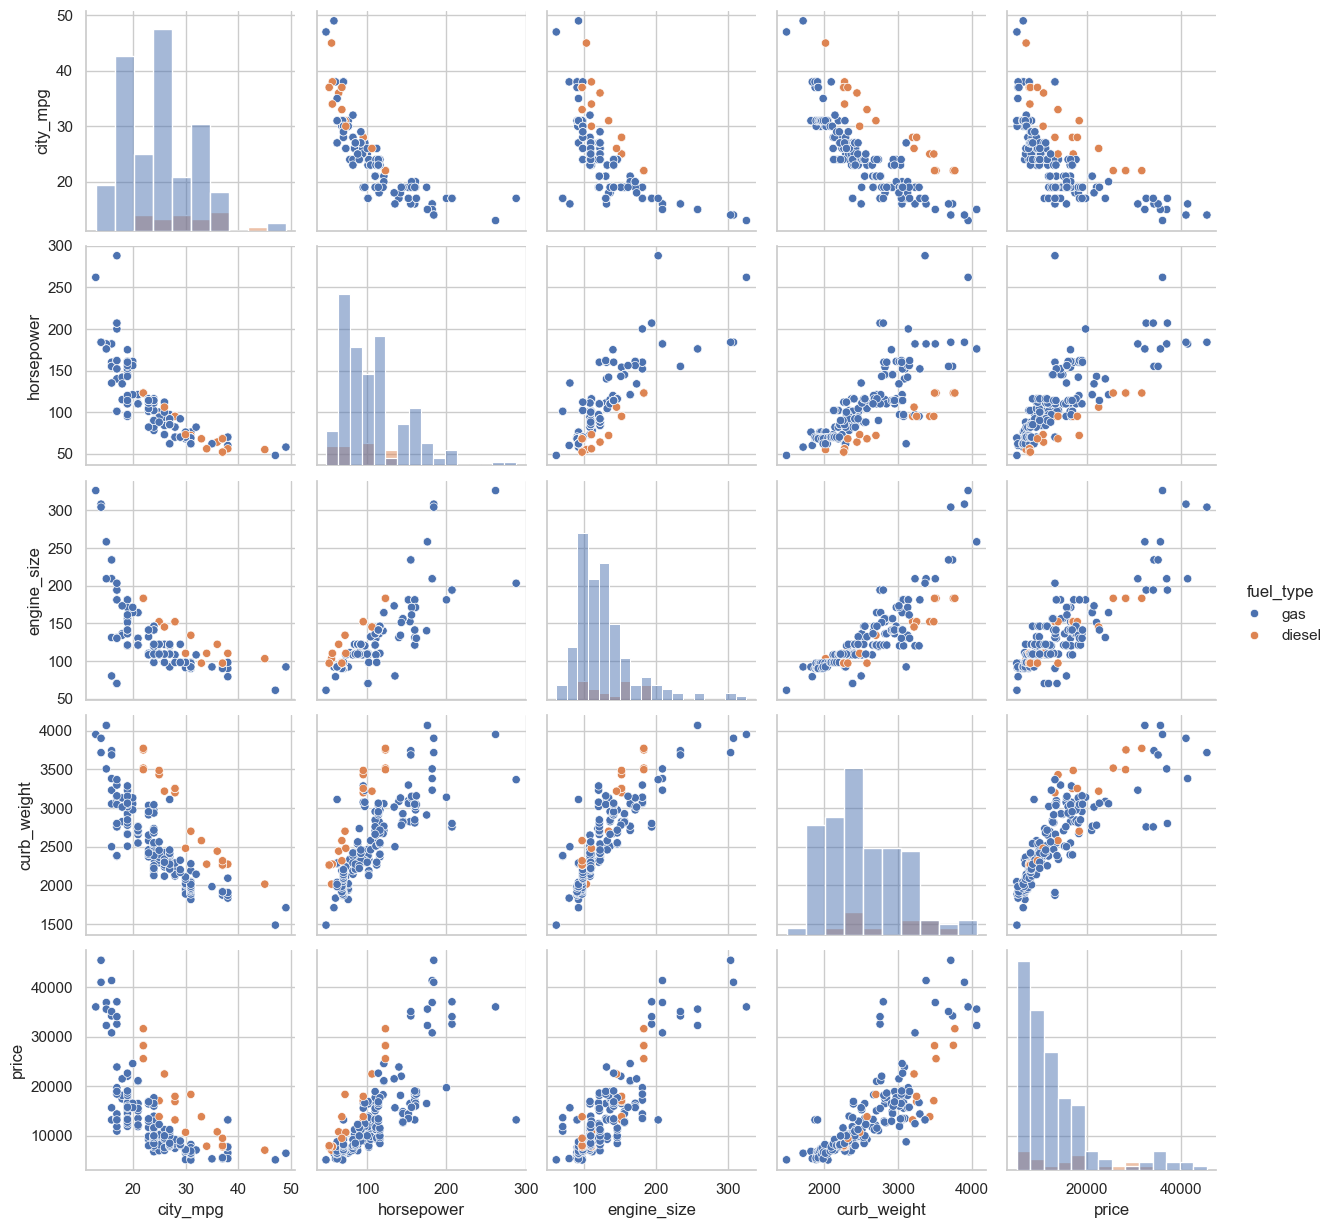

In [86]:
sns.pairplot(df[["city_mpg", "horsepower", "engine_size", "curb_weight","price", "fuel_type"]], hue="fuel_type", diag_kind="hist")

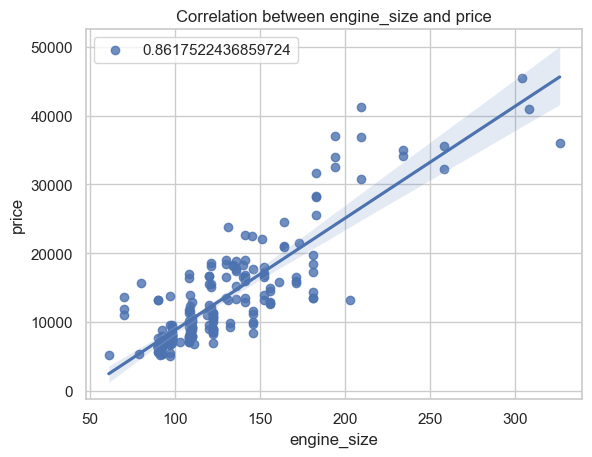

In [87]:
sns.regplot(x = 'engine_size', y = 'price', data = df,label=df["engine_size"].corr(df["price"]))
plt.title("Correlation between engine_size and price")
plt.legend()
plt.show()

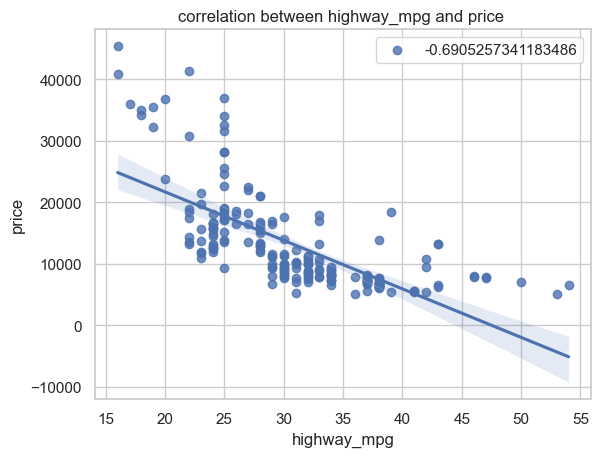

In [88]:
sns.regplot(x='highway_mpg', y='price',data=df,label=df["highway_mpg"].corr(df["price"]))
plt.title('correlation between highway_mpg and price ')
plt.legend()
plt.show()


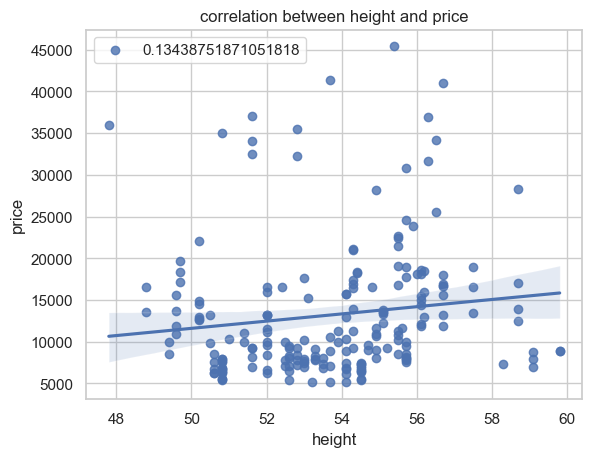

In [89]:
sns.regplot(x='height', y='price', data=df, label=df["height"].corr(df["price"]))
plt.title('correlation between height and price')
plt.legend()
plt.show()

In [90]:
df["make"].to_csv("model",index=False)

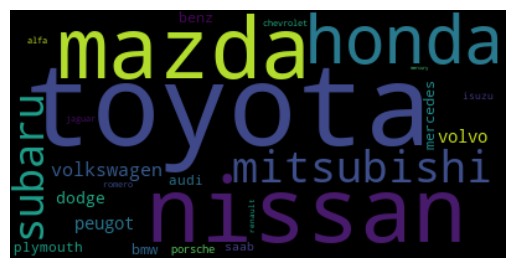

In [92]:
from wordcloud import WordCloud,STOPWORDS
data=pd.read_csv("model")
#df.isna().sum()
text = " ".join(cat.split()[0] for cat in data["make"].values)
word_cloud = WordCloud(collocations = False, background_color = 'black').generate(text)
#plt.imshow(word_cloud)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()
word_cloud.to_file("cars_model.png");